## Selecting elbow point for *k*-means clustering

Clustering is a type of unsupervised learning, where the AI system is given examples and has to find patterns among them. In *k*-means clustering, the algorithm works by repeatedly assigning clusters to *k* number of cluster centres.

As the value of *k* is not known in advance, we can find a suitable value using **elbow point**. It is found by repeatedly calculating the sum of squared distances of samples to their closest cluster center for a range of *k* values. Initially, there will be a steep reduction in the sum of squared distances, but after a certain point the curve will almost level off - that point is known as the elbow point.

In [1]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

The dataset contains measurements of Martian rocks collected by the Opportunity rover. Our task is to work out how many sample tubes will be needed by the rover. To maximise the scientific value of the samples, we want the rover to collect exactly one sample of each distinct type of rock. 

In [2]:
# importing dataset
rocks = pd.read_csv("rocks-assessment3.csv")

rocks

,reflective-red,reflective-blue,hard,porous
0,2.844215,2.963396,7.113128,5.246739
1,2.168376,2.609742,5.614799,5.571129
2,3.285575,2.643181,6.433660,5.409300
3,1.738608,2.946285,6.505526,5.393949
4,2.921743,2.685629,8.540025,5.918761
...,...,...,...,...
180,7.501657,2.106162,9.590414,5.381240
181,8.905066,1.675838,7.297609,4.795633
182,6.957330,1.257097,8.556775,5.739334
183,7.825338,1.548171,9.267241,4.941576


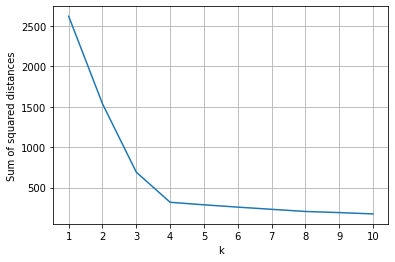

In [3]:
# empty dictionary for storing k : sum of squared distances of samples to their closest cluster center
results = {}

# testing ks from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(rocks)
    # inertia_ attribute stores the sum of squared distances of samples to their closest cluster center
    results[k] = kmeans.inertia_

# plotting the results
plt.plot(results.keys(), results.values())
plt.xticks(list(results.keys()))
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.grid()
plt.show()

In the above graph we can see that the elbow point occurs when *k* = 4.

In [4]:
# adding predicted class to the dataframe
rocks["class"] = KMeans(n_clusters=4, random_state=0).fit_predict(rocks)

rocks

,reflective-red,reflective-blue,hard,porous,class
0,2.844215,2.963396,7.113128,5.246739,3
1,2.168376,2.609742,5.614799,5.571129,3
2,3.285575,2.643181,6.433660,5.409300,3
3,1.738608,2.946285,6.505526,5.393949,3
4,2.921743,2.685629,8.540025,5.918761,3
...,...,...,...,...,...
180,7.501657,2.106162,9.590414,5.381240,0
181,8.905066,1.675838,7.297609,4.795633,0
182,6.957330,1.257097,8.556775,5.739334,0
183,7.825338,1.548171,9.267241,4.941576,0


The visualisation of the data clustered into 4 separate classes can be seen below.

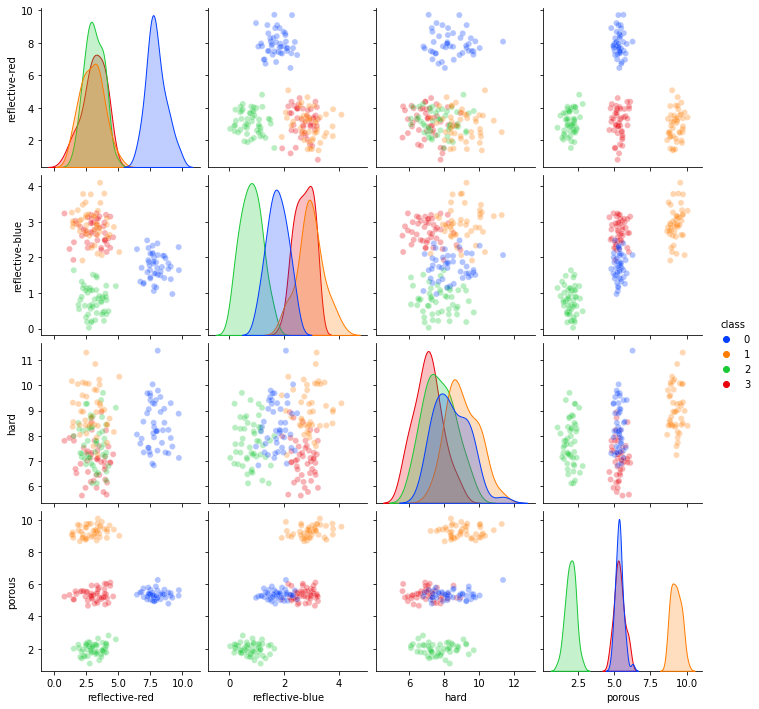

In [5]:
# visualising the clustered data
sns.pairplot(rocks, diag_kind='kde', plot_kws={'alpha': 0.3}, hue = "class", palette="bright")
plt.show()